# Summary
## Notebook Introduction
This executable document (it is called a [Jupyter notebook](http://ipython.org/notebook.html)) 
will allow you to interactively explore your acquired data and generate plots for the lab reports.

If you are reading this notebook online, please refer to 
[this quick-start guide](http://jupyter-notebook-beginner-guide.readthedocs.org) 
for instructions on how to install the required software and run the notebook 
on your machine. 

If it's the first time you are using a Jupyter notebook, please click on 
*Help* -> *User Interface Tour* for a quick tour of the interface.

In this notebook there are "text cells", such as this paragraph, and "code cells",
containing the code to be executed. To execute a code cell, select it and 
press SHIFT+ENTER. To edit a code cell it must be selected and with a green 
frame around it.

## Data Pre-processing
Your acquired data will be available in the Excel spreadsheet format.  For processing data within Jupyter notebook you will need to convert every Excel sheet into a CSV file.  Further, it is recommended that you add simple column names to your data file.  Please avoid names with spaces or non-alphanumeric characters.  Column names like 'Time' or 'pH' will work well, but names like 'Time (sec)' or '10^-pH' will likely cause problems.  Save your CSV files on a USB flash drive or cloud storage of your choice. 

## Working with Data
This notebook will focus on 1) loading a data file, 2) generating a simple plot of data, and 3) using gaussian and exponential models to fit the data.

## 0. Initializing Notebook
In this part we run a script that imports necessary modules and defines functions like choose_file() below.

In [1]:
%matplotlib inline

In [2]:
from pylab import *
from scipy.optimize import curve_fit
import pandas as pd

def choose_file():
    from PyQt4 import QtGui
    app = QtGui.QApplication([dir])
    fname = QtGui.QFileDialog.getOpenFileName(None, "Select a file...", '.', filter="All files (*)")
    return str(fname)

## 1. Loading a data file

There are several methods for loading data files into Jupyter notebook.  Here we will use a graphical user interface (GUI) approach to simplify file selection.  An alternate approach is to load data from using built-in functions/methods (eg. `numpy.loadtxt()` or `pandas.read_csv()`)

### Select file

In [3]:
filename = choose_file()

### Load file


In [4]:
data = pd.read_csv(filename)
data

,time,conc
0,0.0,2.994109
1,0.1,2.931366
2,0.2,2.513379
3,0.3,2.173372
4,0.4,1.637637
5,0.5,1.484634
6,0.6,1.593056
7,0.7,1.652162
8,0.8,1.208850
9,0.9,0.902282


### Display Basic Stats

In [5]:
data.describe()

,time,conc
count,50.000000,50.000000
mean,2.450000,0.891125
std,1.457738,0.632582
min,0.000000,0.162653
25%,1.225000,0.520901
50%,2.450000,0.691594
75%,3.675000,0.967204
max,4.900000,2.994109


# 2. Simple Plotting

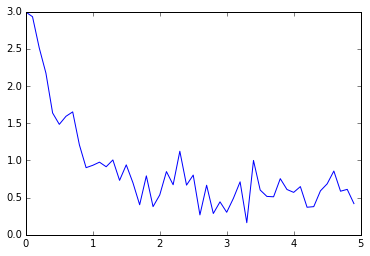

In [7]:
xdata = data['time']
ydata = data['conc']
plot(xdata,ydata)

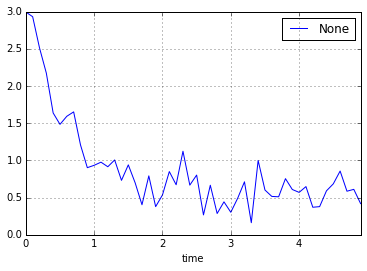

In [10]:
data.plot(x='time',y='conc')

In [11]:
def fexp(x,a,b,c):
    return a*exp(-b*x)+c

def fgau(x,a,b,c):
    return a*exp(-b*x**2)+c

# 3. Curve Fitting

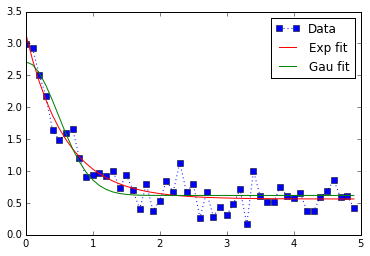

In [12]:
pe,ce = curve_fit(fexp,xdata,ydata)
pg,cg = curve_fit(fgau,xdata,ydata)
yexp = fexp(xdata,*pe)
ygau = fgau(xdata,*pg)
    
plot(xdata,ydata,'-sb',ls=':',label='Data')

plot(xdata,yexp,'r-',label='Exp fit')
plot(xdata,ygau,'g-',label='Gau fit')
legend()

In [13]:
print 'Exp fit params         {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pe)
print 'Exp fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(ce)))
print 'Gau fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pg)
print 'Gau fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cg)))

Exp fit params          2.590  1.707  0.561
Exp fit std dev         0.140  0.170  0.039
Gau fit parameters      2.095  2.155  0.617
Gau fit std dev         0.127  0.330  0.038
